In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("Spotify_data.csv")
data.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [11]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,https://open.spotify.com/track/2HYFX63wP3otVIv...,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,https://open.spotify.com/track/7iabz12vAuVQYye...,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,https://open.spotify.com/track/331l3xABO0HMr1K...,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,https://open.spotify.com/track/48lxT5qJF0yYyf2...,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [12]:
data.isnull().sum()

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

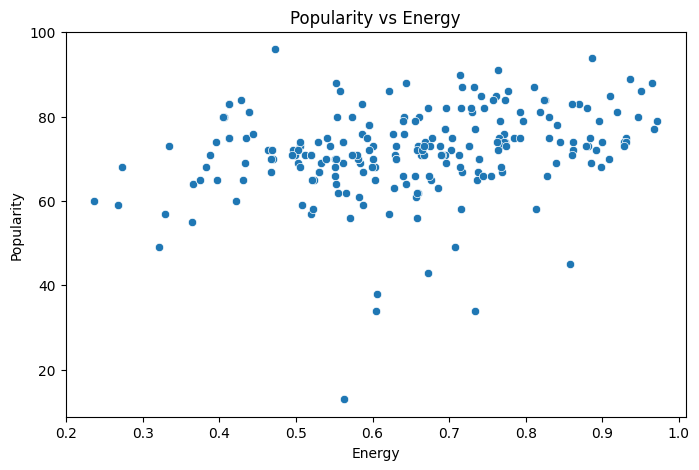

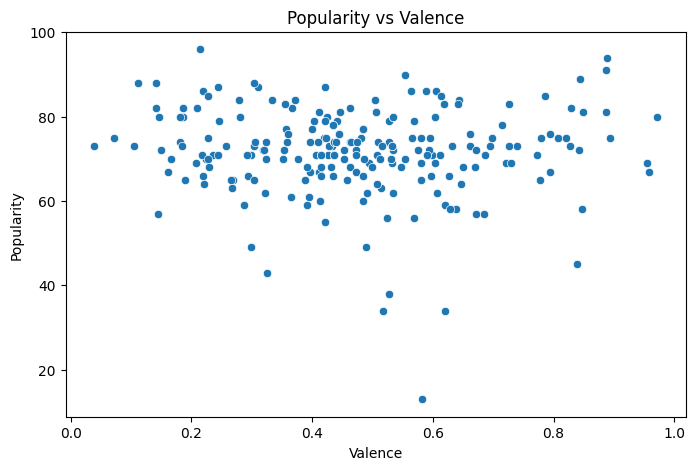

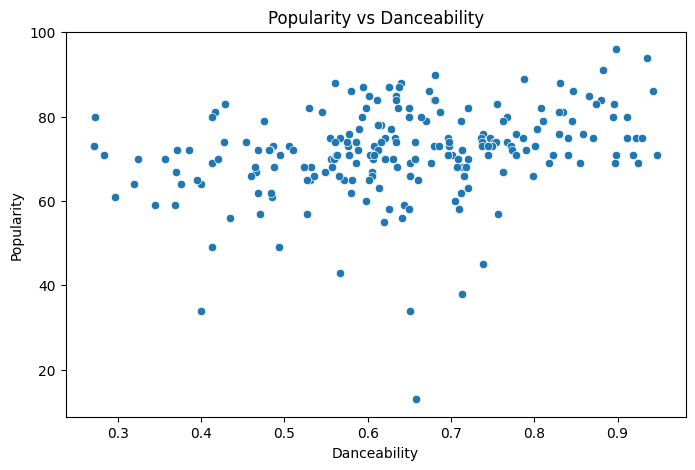

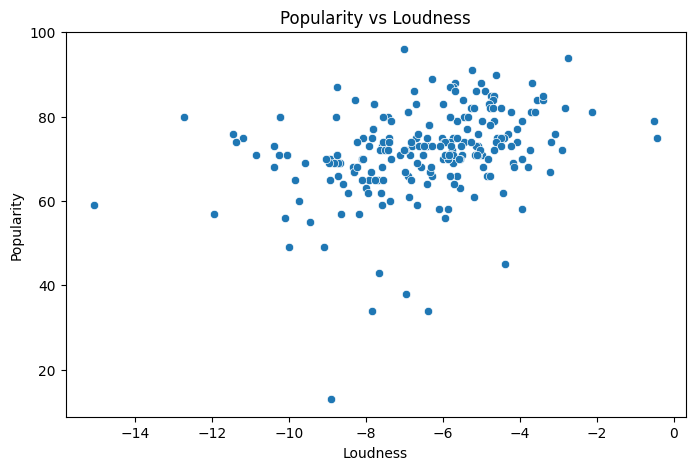

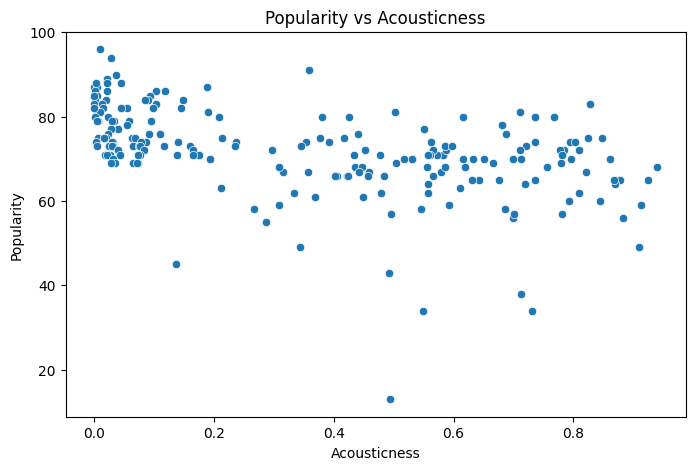

In [13]:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
for feature in features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=data,x=feature,y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

In [16]:
numeric_columns = data.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['Popularity', 'Duration (ms)', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo'],
      dtype='object')

In [17]:
numeric_data=data[numeric_columns]
numeric_data

,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,96,274192,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,94,227239,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,91,140733,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,90,149668,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,89,144846,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,66,272680,0.565,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,58,309103,0.626,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,62,281992,0.484,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,65,305232,0.602,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


In [18]:
corr_matrix = numeric_data.corr()

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(spotify_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = spotify_data[features]
y = spotify_data['Popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

In [ ]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()